In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#website link of data http://www-bcf.usc.edu/~gareth/ISL/data.html(pick Advertising.csv)
df=pd.read_csv("C:\\Users\\User\\Downloads\\Advertising.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info() #There is no null entries in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


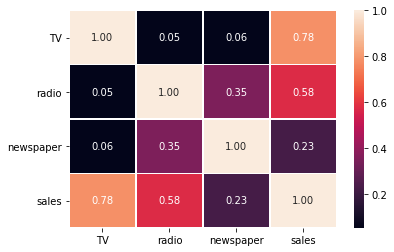

In [4]:
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt='.2f')# The heat map shows there is a strong positive co-relation between 
                                                            # TV and Sales

Text(0,0.5,'SALES')

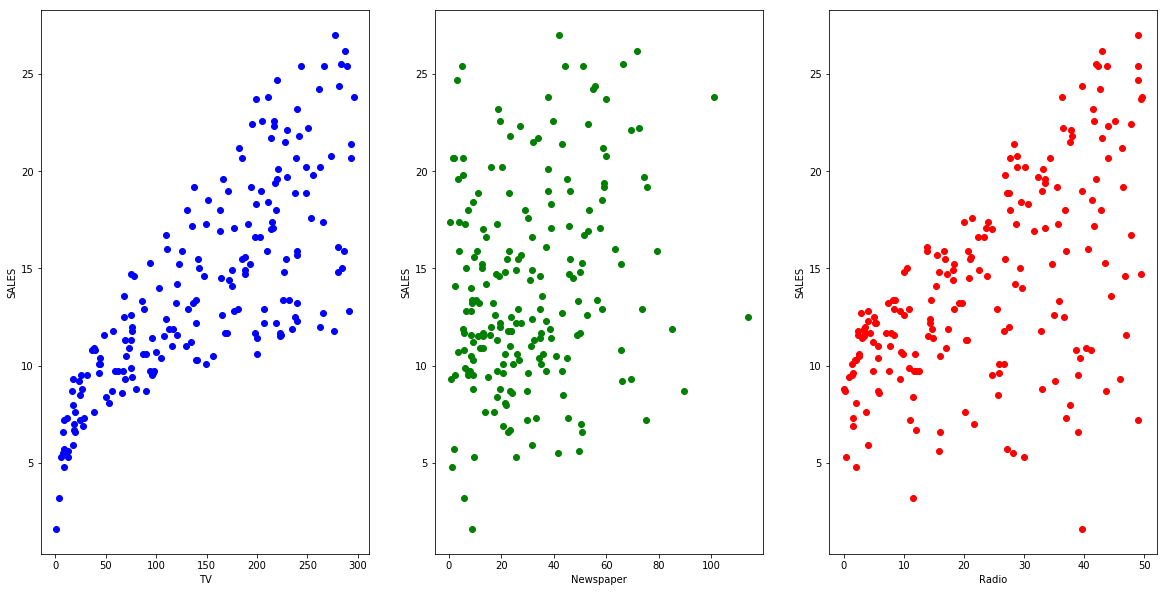

In [5]:
plt.figure(figsize= (20 ,10))
plt.subplot(1, 3, 1)
plt.scatter(df.TV, df.sales, color='b')
plt.xlabel('TV')
plt.ylabel('SALES')
#------------------------------------------------------------
plt.subplot(1, 3, 2)
plt.scatter(df.newspaper, df.sales, color='g')
plt.xlabel('Newspaper')
plt.ylabel('SALES')
#------------------------------------------------------------
plt.subplot(1, 3, 3)
plt.scatter(df.radio, df.sales, color='r')
plt.xlabel('Radio')
plt.ylabel('SALES')

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [7]:
copy=df.copy()

In [8]:
data=pd.DataFrame(copy, columns=['TV', 'radio'])# ----Predicting using two best features(TV and radio) as seen by heat map
data.head()                                     # Corelation of Tv and sales =0.78 and corelation of radio and sales=0.58
                                                #from heatmap

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [9]:
reg1=LinearRegression()
reg1.fit(data, copy.sales)
copy['Prediction1']=reg1.predict(data)

In [10]:
copy.head()

,TV,radio,newspaper,sales,Prediction1
0,230.1,37.8,69.2,22.1,20.555465
1,44.5,39.3,45.1,10.4,12.345362
2,17.2,45.9,69.3,9.3,12.337018
3,151.5,41.3,58.5,18.5,17.617116
4,180.8,10.8,58.4,12.9,13.223908


In [11]:
reg1.coef_

array([0.04575482, 0.18799423])

In [12]:
reg1.intercept_

2.9210999124051362

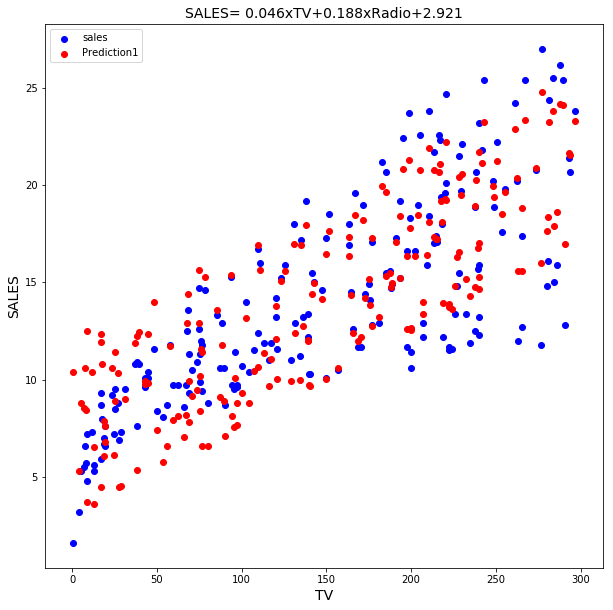

In [13]:
plt.figure(figsize=(10, 10))
plt.scatter(copy.TV, copy.sales, color='b')
plt.scatter(copy.TV, copy.Prediction1, color='r')
plt.title('SALES= {:.3f}xTV+{:.3f}xRadio+{:.3f}'.format(reg1.coef_[0], reg1.coef_[1], reg1.intercept_), fontsize=14)
plt.ylabel('SALES', fontsize=14)
plt.xlabel('TV', fontsize=14)
plt.legend(loc='best')

In [14]:
# Calculating Root Mean Squared Error when both Radio and TVare used for prediction
print('RMSE=', math.sqrt(mean_squared_error(copy.sales, copy.Prediction1)))

RMSE= 1.668703059366193


Text(0,0.5,'Predicted SALES using TV and Radio')

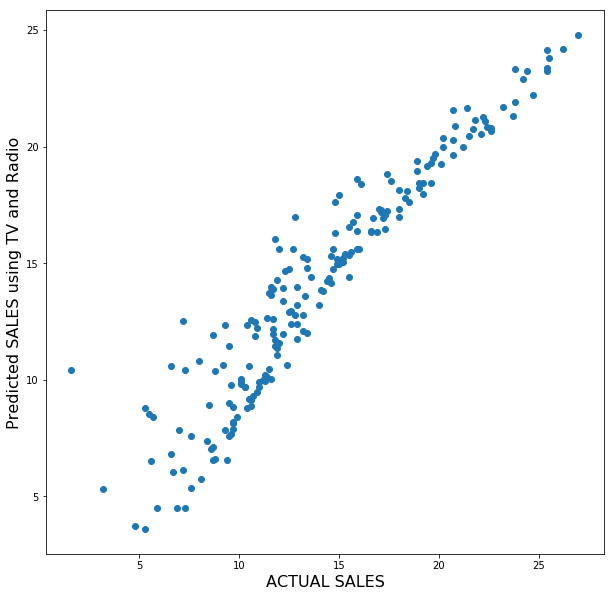

In [15]:
plt.figure(figsize=(10 ,10))
plt.scatter(copy.sales, copy.Prediction1)
plt.xlabel('ACTUAL SALES', fontsize=16)
plt.ylabel('Predicted SALES using TV and Radio', fontsize=16)

In [16]:
#=================Now we will predict using only TV data=================================================

In [17]:
reg2=LinearRegression()
reg2.fit(copy.TV.reshape(-1, 1), copy.sales)
copy['Prediction2']=reg2.predict(copy.TV.reshape(-1, 1))

In [18]:
copy.head()

,TV,radio,newspaper,sales,Prediction1,Prediction2
0,230.1,37.8,69.2,22.1,20.555465,17.970775
1,44.5,39.3,45.1,10.4,12.345362,9.147974
2,17.2,45.9,69.3,9.3,12.337018,7.850224
3,151.5,41.3,58.5,18.5,17.617116,14.234395
4,180.8,10.8,58.4,12.9,13.223908,15.627218


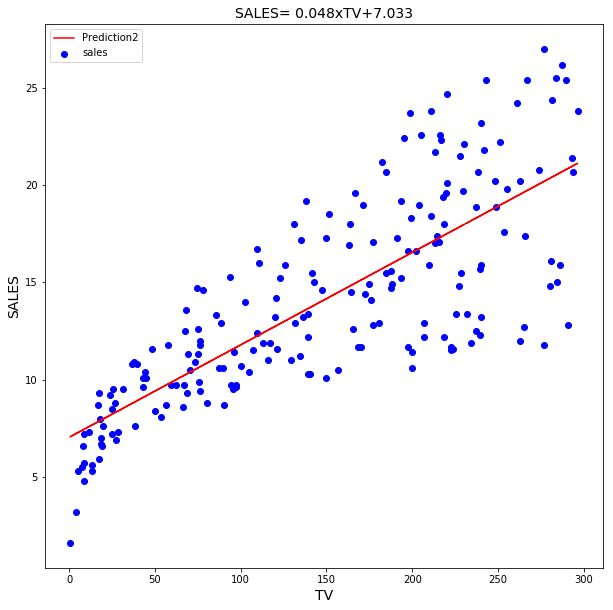

In [19]:
plt.figure(figsize=(10, 10))
plt.scatter(copy.TV, copy.sales, color='b')
plt.plot(copy.TV, copy.Prediction2, color='r')
plt.title('SALES= {:.3f}xTV+{:.3f}'.format(reg2.coef_[0], reg2.intercept_), fontsize=14)
plt.ylabel('SALES', fontsize=14)
plt.xlabel('TV', fontsize=14)
plt.legend(loc='best')

In [20]:
# Calculating Root Mean Squared Error when only TV is used for prediction
print('RMSE=', math.sqrt(mean_squared_error(copy.sales, copy.Prediction2)))

RMSE= 3.2423221486546887


Text(0,0.5,'Predicted SALES using only TV')

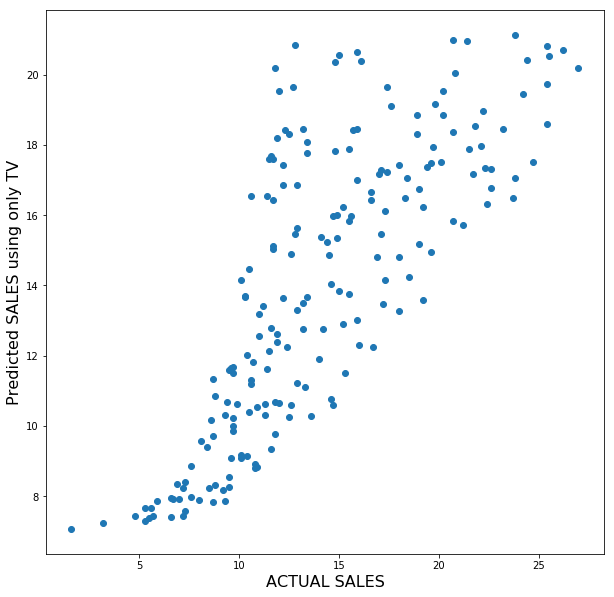

In [21]:
plt.figure(figsize=(10 ,10))
plt.scatter(copy.sales, copy.Prediction2)
plt.xlabel('ACTUAL SALES', fontsize=16)
plt.ylabel('Predicted SALES using only TV', fontsize=16)

Text(0.5,1,'RMSE=3.24')

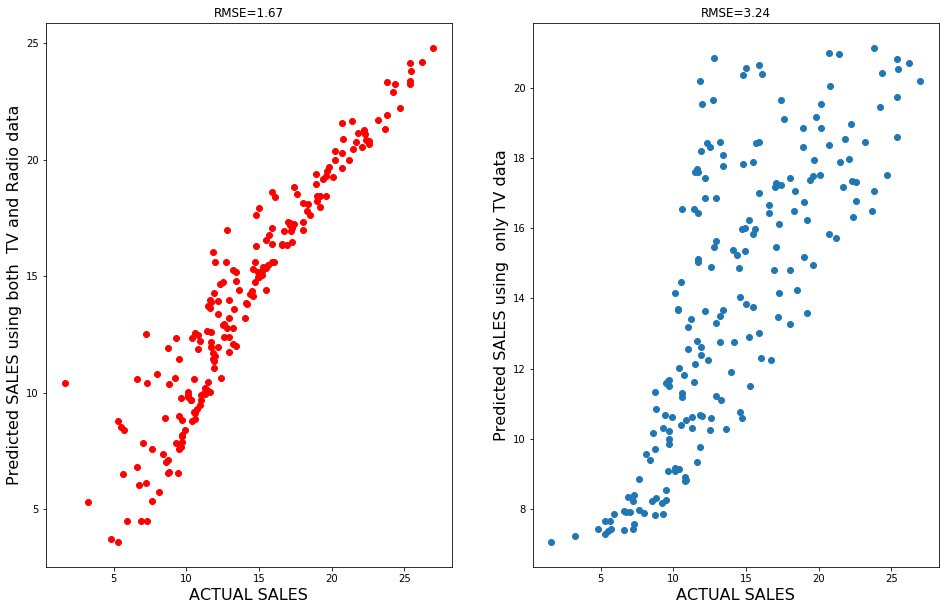

In [22]:
plt.figure(figsize=(16 ,10))
plt.subplot(1 ,2 ,1)
plt.scatter(copy.sales, copy.Prediction1, color='r')
plt.xlabel('ACTUAL SALES', fontsize=16)
plt.ylabel('Predicted SALES using both  TV and Radio data', fontsize=16)
plt.title('RMSE='+str(round(math.sqrt(mean_squared_error(copy.sales, copy.Prediction1)), 2)))
#----------------------------------------------------------------------------------------------------------------------------
plt.subplot(1, 2, 2)
plt.scatter(copy.sales, copy.Prediction2)
plt.xlabel('ACTUAL SALES', fontsize=16)
plt.ylabel('Predicted SALES using  only TV data', fontsize=16)
plt.title('RMSE='+str(round(math.sqrt(mean_squared_error(copy.sales, copy.Prediction2)), 2)))

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
param_grid={'kernel': ('linear', 'rbf' ), 'C': np.arange(1.0, 6.0, 1.0), 'gamma': np.arange(0.5, 4.5, 0.3)}
svr=SVR()
grid=GridSearchCV(svr, param_grid, scoring='r2', cv=2)

In [29]:
grid.fit(data, copy.sales)
grid.best_score_


0.8890696399338467

In [30]:
grid.best_params_ # AFter Grid searchCV, the best parameters are shown 

{'C': 1.0, 'gamma': 0.5, 'kernel': 'linear'}

In [31]:
copy['Prediction3']=grid.predict(data)
copy.head()

,TV,radio,newspaper,sales,Prediction1,Prediction2,Prediction3
0,230.1,37.8,69.2,22.1,20.555465,17.970775,20.786037
1,44.5,39.3,45.1,10.4,12.345362,9.147974,13.071226
2,17.2,45.9,69.3,9.3,12.337018,7.850224,13.197647
3,151.5,41.3,58.5,18.5,17.617116,14.234395,18.085243
4,180.8,10.8,58.4,12.9,13.223908,15.627218,13.320134


In [32]:
math.sqrt(mean_squared_error(copy.sales, copy.Prediction3))

1.715732032734899

Text(0.5,1,'RMSE=1.72')

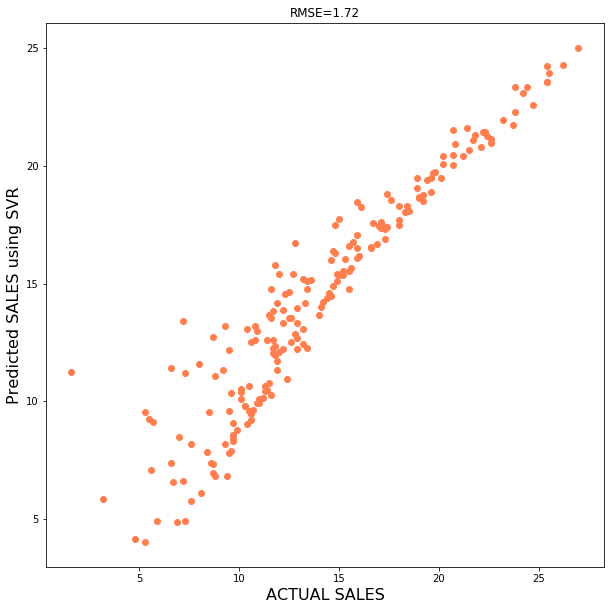

In [35]:
plt.figure(figsize=(10 ,10))
plt.scatter(copy.sales, copy.Prediction3, color='coral')
plt.xlabel('ACTUAL SALES', fontsize=16)
plt.ylabel('Predicted SALES using SVR', fontsize=16)
plt.title('RMSE='+str(round(math.sqrt(mean_squared_error(copy.sales, copy.Prediction3)), 2)))

Text(0.5,1,'RMSE=1.72')

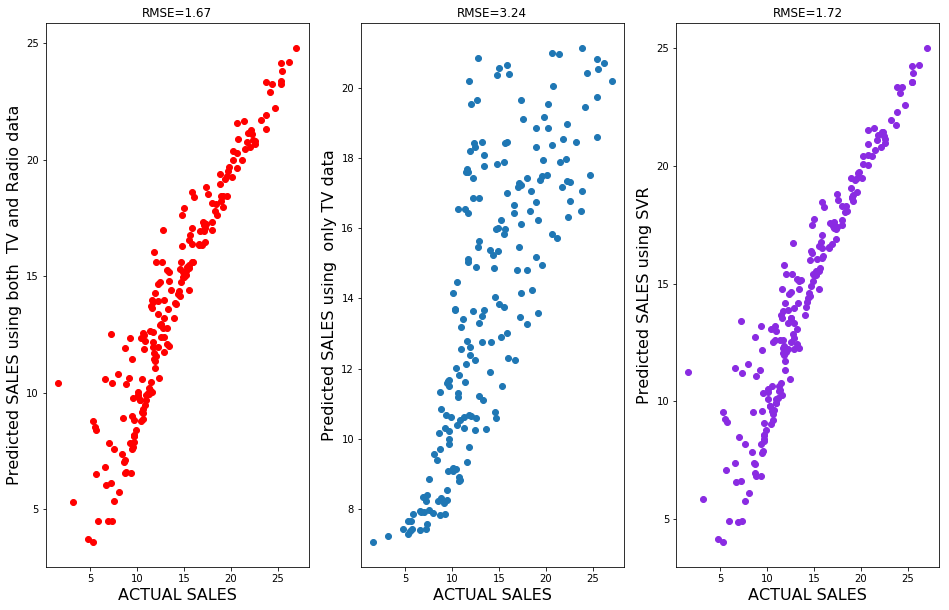

In [49]:
plt.figure(figsize=(16 ,10))
plt.subplot(1 ,3 ,1)
plt.scatter(copy.sales, copy.Prediction1, color='r')
plt.xlabel('ACTUAL SALES', fontsize=16)
plt.ylabel('Predicted SALES using both  TV and Radio data', fontsize=16)
plt.title('RMSE='+str(round(math.sqrt(mean_squared_error(copy.sales, copy.Prediction1)), 2)))
#----------------------------------------------------------------------------------------------------------------------------
plt.subplot(1, 3, 2)
plt.scatter(copy.sales, copy.Prediction2)
plt.xlabel('ACTUAL SALES', fontsize=16)
plt.ylabel('Predicted SALES using  only TV data', fontsize=16)
plt.title('RMSE='+str(round(math.sqrt(mean_squared_error(copy.sales, copy.Prediction2)), 2)))
#-----------------------------------------------------------------------------------------------------------------------------
plt.subplot(1, 3, 3)
plt.scatter(copy.sales, copy.Prediction3, color='blueviolet')
plt.xlabel('ACTUAL SALES', fontsize=16)
plt.ylabel('Predicted SALES using SVR', fontsize=16)
plt.title('RMSE='+str(round(math.sqrt(mean_squared_error(copy.sales, copy.Prediction3)), 2)))

In [48]:
#++++++++++++++++++++++++++++++  BONUS ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, '------------------>',hex)

aliceblue ------------------> #F0F8FF
antiquewhite ------------------> #FAEBD7
aqua ------------------> #00FFFF
aquamarine ------------------> #7FFFD4
azure ------------------> #F0FFFF
beige ------------------> #F5F5DC
bisque ------------------> #FFE4C4
black ------------------> #000000
blanchedalmond ------------------> #FFEBCD
blue ------------------> #0000FF
blueviolet ------------------> #8A2BE2
brown ------------------> #A52A2A
burlywood ------------------> #DEB887
cadetblue ------------------> #5F9EA0
chartreuse ------------------> #7FFF00
chocolate ------------------> #D2691E
coral ------------------> #FF7F50
cornflowerblue ------------------> #6495ED
cornsilk ------------------> #FFF8DC
crimson ------------------> #DC143C
cyan ------------------> #00FFFF
darkblue ------------------> #00008B
darkcyan ------------------> #008B8B
darkgoldenrod ------------------> #B8860B
darkgray ------------------> #A9A9A9
darkgreen ------------------> #006400
darkgrey ------------------> #A9A9A9